In [3]:
###Carga en un DataFrame este dataset: 
import pandas as pd
datauto=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",header=None)
cols = ["symboling", "normalized-losses", "make", "fuel-type",  "aspiration",
        "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
        "length", "width", "height","curb-weight", "engine-type", "num-of-cylinders",
        "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",                
        "peak-rpm", "city-mpg", "highway-mpg",  "price"]
datauto.columns = cols
datauto.to_csv("autodata")
datauto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
###Comprueba si tiene datos faltantes y trátalos de la manera que creas más conveniente.
datauto.info()#si alguno es numerico y aparece como"object" significa que hay algún valor caracter y si en cambio a podido transformar a float64 eso significa que no hay ningun valor nulo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
#Para buscar los valores nulos que hay por cada columna
datauto[datauto.isnull()].count()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
###Obtén la longitud(length) y anchuras(width) medias por cada categoría (“body-style”).
medialonganc = datauto[['body-style','length','width']]
medialonganc = medialonganc.groupby(['body-style']).mean()
print(medialonganc)

                 length      width
body-style                        
convertible  170.383333  65.583333
hardtop      176.937500  66.612500
hatchback    166.592857  65.247143
sedan        177.585417  66.260417
wagon        181.304000  66.256000


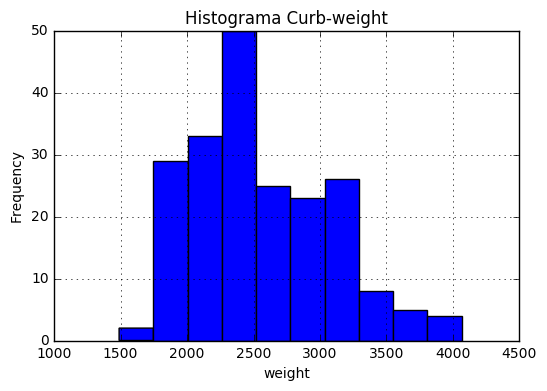

In [7]:
#Analiza el atributo peso (“curb-weight”) y dibuja su histograma para apreciar si sigue alguna distribución concreta.
import matplotlib.pyplot as plt
%matplotlib inline
# histograma de "curb-weight"(peso coche vacio)
datauto.hist('curb-weight')
plt.title('Histograma Curb-weight')
plt.xlabel('weight')
plt.ylabel('Frequency')


In [8]:
#Analiza cuál es el número de cilindros que se da con más frecuencia en el dataset.
import numpy as np 
from scipy import stats
cilindros = np.asarray(datauto['num-of-cylinders'])
cilindros=stats.mode(cilindros)
print(cilindros)



ModeResult(mode=array(['four'], dtype=object), count=array([159]))


C:\Users\Portatil\Anaconda3\lib\site-packages\scipy\stats\stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [11]:
#Obtén una lista ordenada de las diferentes marcas de coches.
marcacoches = datauto.groupby('make').size().sort_values(ascending=False)
print(marcacoches)

make
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
dtype: int64


In [13]:
#########Ejercicio 2#############
#Carga en un DataFrame este dataset: https://archive.ics.uci.edu/ml/datasets/Census+Income
datacensus=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None)
datacensus.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#Estudia si hay variables como el nivel educativo o el país que influyen en que se tuviese un salario mayor o menor de 50K. 
#Puedes simplemente obtener la cuenta de las veces que sucede una u otra cosa de los diferentes grupos.